In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import os
import cv2 as cv
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.inception_resnet_v2 import preprocess_input,decode_predictions
from keras import backend as K
from keras.layers import add, Conv2D,MaxPooling2D,UpSampling2D,Input,BatchNormalization, RepeatVector, Reshape
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
!pip install natsort

from natsort import natsorted
from PIL import Image

In [ ]:
InputPath1='/content/drive/MyDrive/Denoising/train/high'
InputPath2='/content/drive/MyDrive/Denoising/train/low'

255

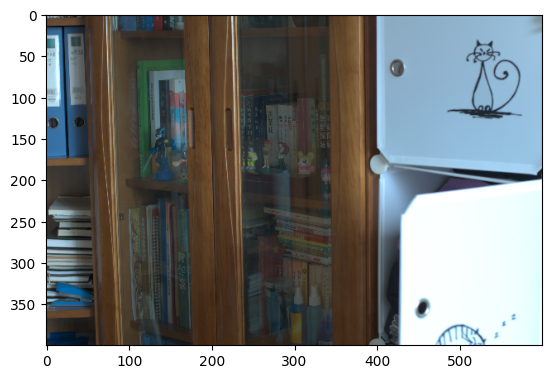

In [ ]:
filename = '2.png'
img = cv.imread(os.path.join(InputPath1, filename))
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
l = img.max()
plt.imshow(img)
l

In [ ]:
 file_names = [f for f in os.listdir(InputPath1) if f.endswith('.png')]

# Step 4: Sort the file names alphabetically
sorted_file_names = sorted(file_names)
X_ = []
for file_name in sorted_file_names:
    file_path = os.path.join(InputPath1, file_name)
    img = Image.open(file_path)
    img_array = np.array(img)
    X_.append(img_array)

In [ ]:
 file_names = [f for f in os.listdir(InputPath2) if f.endswith('.png')]

# Step 4: Sort the file names alphabetically
sorted_file_names = sorted(file_names)
y_ = []
for file_name in sorted_file_names:
    file_path = os.path.join(InputPath2, file_name)
    img = Image.open(file_path)
    img_array = np.array(img)
    y_.append(img_array)

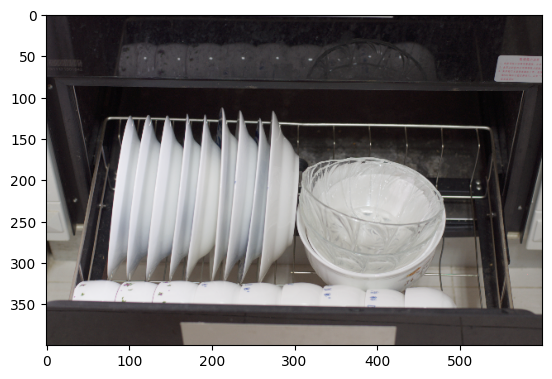

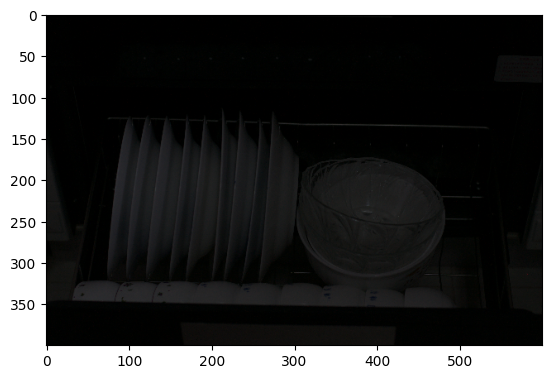

In [ ]:

img1=X_[1]
img2=y_[1]
plt.imshow(img1)
plt.show()
plt.imshow(img2)

In [ ]:
K.clear_session()
def InstantiateModel(in_):

    model_1 = Conv2D(16,(3,3), activation='relu',padding='same',strides=1)(in_)
    model_1 = Conv2D(32,(3,3), activation='relu',padding='same',strides=1)(model_1)
    model_1 = Conv2D(64,(2,2), activation='relu',padding='same',strides=1)(model_1)

    model_2 = Conv2D(32,(3,3), activation='relu',padding='same',strides=1)(in_)
    model_2 = Conv2D(64,(2,2), activation='relu',padding='same',strides=1)(model_2)

    model_2_0 = Conv2D(64,(2,2), activation='relu',padding='same',strides=1)(model_2)

    model_add = add([model_1,model_2,model_2_0])

    model_3 = Conv2D(64,(3,3), activation='relu',padding='same',strides=1)(model_add)
    model_3 = Conv2D(32,(3,3), activation='relu',padding='same',strides=1)(model_3)
    model_3 = Conv2D(16,(2,2), activation='relu',padding='same',strides=1)(model_3)

    model_3_1 = Conv2D(32,(3,3), activation='relu',padding='same',strides=1)(model_add)
    model_3_1 = Conv2D(16,(2,2), activation='relu',padding='same',strides=1)(model_3_1)

    model_3_2 = Conv2D(16,(2,2), activation='relu',padding='same',strides=1)(model_add)

    model_add_2 = add([model_3_1,model_3_2,model_3])

    model_4 = Conv2D(16,(3,3), activation='relu',padding='same',strides=1)(model_add_2)
    model_4_1 = Conv2D(16,(3,3), activation='relu',padding='same',strides=1)(model_add)
    #Extension
    model_add_3 = add([model_4_1,model_add_2,model_4])

    model_5 = Conv2D(16,(3,3), activation='relu',padding='same',strides=1)(model_add_3)
    model_5 = Conv2D(16,(2,2), activation='relu',padding='same',strides=1)(model_add_3)

    model_5 = Conv2D(3,(3,3), activation='relu',padding='same',strides=1)(model_5)

    return model_5


In [ ]:
Input_Sample = Input(shape=(400, 600,3))
Output_ = InstantiateModel(Input_Sample)
Model_Enhancer = Model(inputs=Input_Sample, outputs=Output_)

In [ ]:
Model_Enhancer.compile(optimizer="adam", loss='mean_squared_error')
Model_Enhancer.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 400, 600, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 400, 600, 16)         448       ['input_1[0][0]']             
                                                                                                  
 conv2d_3 (Conv2D)           (None, 400, 600, 32)         896       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 400, 600, 32)         4640      ['conv2d[0][0]']              
                                                                                              

In [ ]:
def GenerateInputs(X, y):
    for i in range(len(X)):
        X_input = X[i].reshape(1, 400, 600, 3)
        y_input = y[i].reshape(1, 400, 600, 3)
        yield (X_input, y_input)


Model_Enhancer.fit_generator(
    GenerateInputs(X_, y_),
    epochs=10,
    verbose=1,
    steps_per_epoch=38,
    shuffle=True,
)

Epoch 1/10


<ipython-input-19-02af65a81fda>:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  Model_Enhancer.fit_generator(


38/38 [==============================] - 3s 89ms/step - loss: 106.2460
Epoch 2/10
38/38 [==============================] - 3s 89ms/step - loss: 116.6410
Epoch 3/10
38/38 [==============================] - 3s 87ms/step - loss: 313.3182
Epoch 4/10
38/38 [==============================] - 3s 88ms/step - loss: 434.2534
Epoch 5/10
38/38 [==============================] - 3s 88ms/step - loss: 79.4153
Epoch 6/10
38/38 [==============================] - 3s 89ms/step - loss: 107.4623
Epoch 7/10
38/38 [==============================] - 3s 88ms/step - loss: 238.2960
Epoch 8/10
38/38 [==============================] - 3s 88ms/step - loss: 251.4214
Epoch 9/10
38/38 [==============================] - 3s 88ms/step - loss: 161.8028
Epoch 10/10
38/38 [==============================] - 3s 91ms/step - loss: 130.9575


In [ ]:
TestPath='/content/drive/MyDrive/Denoising/train/low'

In [ ]:
def ExtractTestInput(ImagePath, filename):
    img = cv.imread(os.path.join(ImagePath, filename))
    img_ = cv.resize(img,(600,400))
    return img_

In [ ]:
fil = '2.png'
image_for_test = ExtractTestInput(TestPath, fil)
image_for_test = np.expand_dims(image_for_test, axis=0)
Prediction = Model_Enhancer.predict(image_for_test)

1/1 [==============================] - 0s 29ms/step


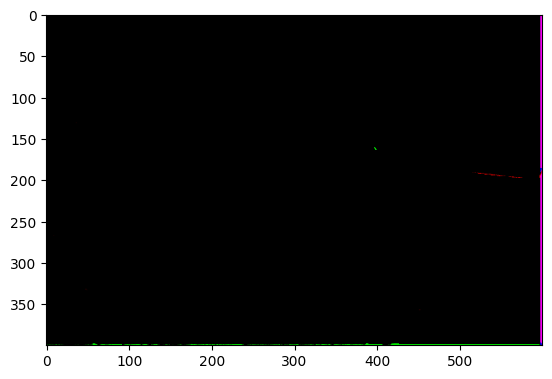

In [ ]:
Prediction = Prediction.reshape(400,600,3)
plt.imshow(Prediction)